<a href="https://colab.research.google.com/github/sumanxg/Image-Classification/blob/master/vOILENT_oBJECT_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading the images of dataset-gun

Loading the images of dataset-knife

Loading the images of dataset-violence

Loading the images of dataset-testing

(740, 128, 128)
(array([-1,  0,  1,  2]), array([  3, 333, 300, 104]))
(740, 128, 128, 1)
Epoch 1/13
37/37 [==============================] - 26s 677ms/step - loss: 1.0567 - accuracy: 0.5152 - val_loss: 1.0587 - val_accuracy: 0.4122
Epoch 2/13
37/37 [==============================] - 24s 637ms/step - loss: 0.7471 - accuracy: 0.7196 - val_loss: 0.5726 - val_accuracy: 0.8041
Epoch 3/13
37/37 [==============================] - 24s 649ms/step - loss: 0.5527 - accuracy: 0.7855 - val_loss: 0.4187 - val_accuracy: 0.8176
Epoch 4/13
37/37 [==============================] - 24s 663ms/step - loss: 0.4515 - accuracy: 0.8091 - val_loss: 0.4435 - val_accuracy: 0.7635
Epoch 5/13
37/37 [==============================] - 25s 66

NameError: ignored

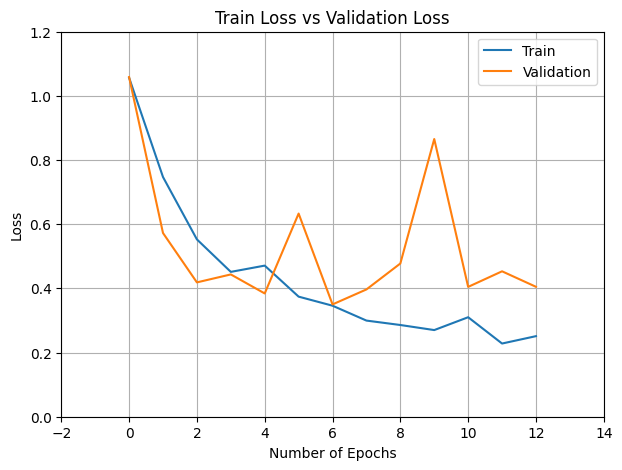

In [2]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define data path
data_path = '/content/drive/MyDrive/data'
data_dir_list = os.listdir(data_path)

img_rows = 128
img_cols = 128
num_channel = 1
num_epochs = 13

# Define the number of classes
num_classes = 3

unknown_label = -1  # Assign a unique integer value for 'Unknown'

labels_name = {'gun': 0, 'knife': 1, 'violence': 2}

img_data_list = []
labels_list = []

for dataset in data_dir_list:
    img_list = os.listdir(os.path.join(data_path, dataset))
    print('Loading the images of dataset-{}\n'.format(dataset))
    label = labels_name.get(dataset, unknown_label)
    for img in img_list:
        input_img = cv2.imread(os.path.join(data_path, dataset, img))
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize = cv2.resize(input_img, (128, 128))
        img_data_list.append(input_img_resize)
        labels_list.append(label)


img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print(img_data.shape)

labels = np.array(labels_list)
print(np.unique(labels, return_counts=True))

# convert class labels to one-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

img_data = np.expand_dims(img_data, axis=3)
print(img_data.shape)

# Shuffle the dataset
img_data, Y = shuffle(img_data, Y, random_state=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2, random_state=2)

# Defining the model
input_shape = (img_rows, img_cols, num_channel)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

# Training
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epochs, verbose=1, validation_data=(X_test, y_test))

# Visualizing losses and accuracy
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(num_epochs)

plt.figure(1, figsize=(7, 5))
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train', 'Validation'])
plt.style.use(['classic'])

# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# Saving and loading the model and weights
model.save('model.h5')
print("Saved model to disk")


In [6]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Convert Keras model to TensorFlow SavedModel format
tf.saved_model.save(model, '/content/drive/MyDrive/data/')

# Convert to .pb file
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/data/')
tflite_model = converter.convert()

# Save .pb file
with open('/content/drive/MyDrive/data/trainedmodel.pb', 'wb') as f:
    f.write(tflite_model)


Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' to decorate the function.
Use '@tf.function' or '@defun' 